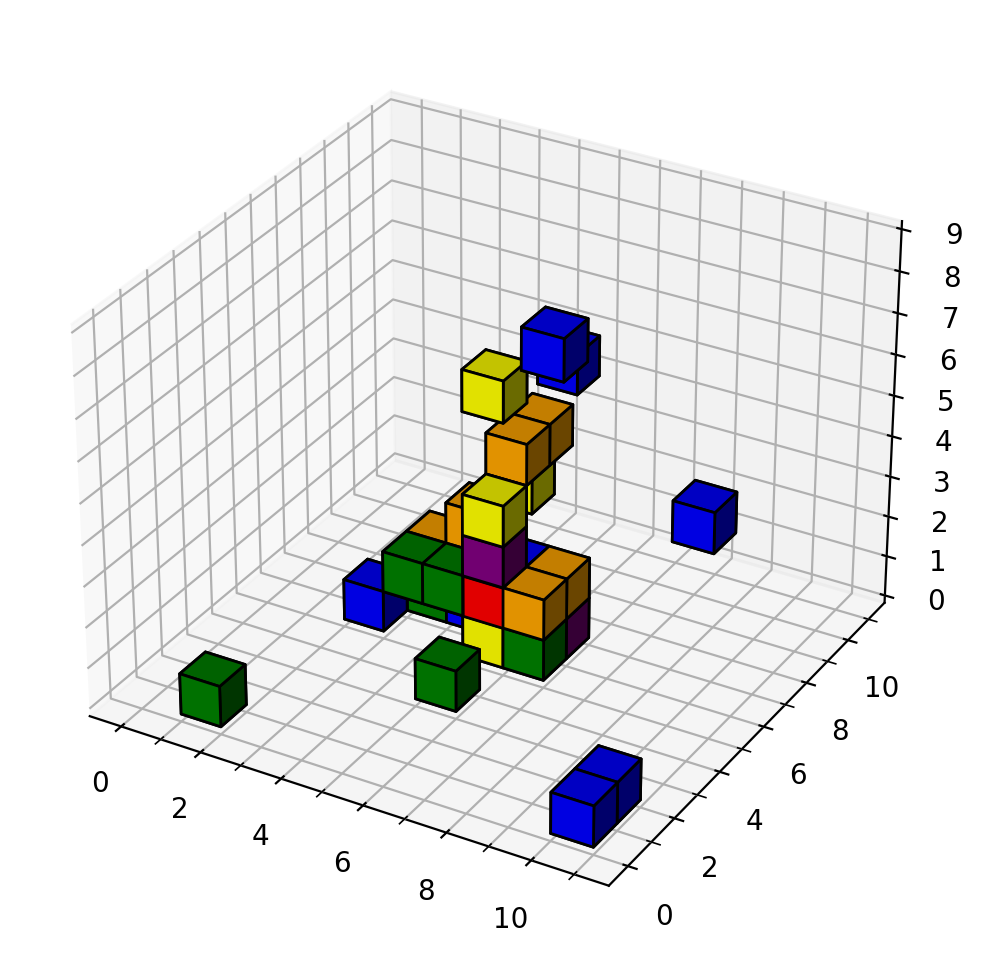

In [56]:
plot = plot_grid(np.abs(output_grids[12].astype(int)))

In [61]:
torch.save(model.state_dict(), "bert_gridclass_bl_01")

# Evaluation

In [58]:
test_grids_inshape = np.stack(np.argmax(np.reshape(test_labels, (59, 9, 11, 11, 7)), axis=4), axis=0)

In [60]:
total_f1 = []

# Evaluation
# TODO: Needs double checking!
for idx in range(len(test_grids_inshape)):
    synthetic_task = Task('', target_grid=test_grids_inshape[idx])
    argmax = synthetic_task.argmax_intersection(test_grids_inshape[idx])
    maximal_intersection = synthetic_task.get_intersection(test_grids_inshape[idx], *argmax)
        
    precision = maximal_intersection / (synthetic_task.target_size + 1e-10)
    recall = maximal_intersection / (len(test_grids_inshape[idx].nonzero()[0]) + 1e-10)
    f1 = 2 * precision * recall / (precision + recall + 1e-10)
    #print(precision, recall, f1)
    total_f1.append(f1)
    print(precision, recall, f1)

print(np.mean(total_f1))

0.9999999999 0.9999999999 0.99999999985
0.99999999998 0.99999999998 0.99999999993
0.9999999999 0.9999999999 0.99999999985
0.999999999975 0.999999999975 0.999999999925
0.99999999995 0.99999999995 0.9999999999
0.999999999975 0.999999999975 0.999999999925
0.99999999995 0.99999999995 0.9999999999
0.9999999999 0.9999999999 0.99999999985
0.99999999995 0.99999999995 0.9999999999
0.9999999999666667 0.9999999999666667 0.9999999999166667
0.999999999990909 0.999999999990909 0.999999999940909
0.9999999999666667 0.9999999999666667 0.9999999999166667
0.99999999995 0.99999999995 0.9999999999
0.9999999999 0.9999999999 0.99999999985
0.99999999995 0.99999999995 0.9999999999
0.9999999999 0.9999999999 0.99999999985
0.999999999975 0.999999999975 0.999999999925
0.999999999975 0.999999999975 0.999999999925
0.9999999999 0.9999999999 0.99999999985
0.999999999975 0.999999999975 0.999999999925
0.9999999999 0.9999999999 0.99999999985
0.999999999975 0.999999999975 0.999999999925
0.9999999999666667 0.99999999996666